# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [200,300,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731
1,16448,6243,6360,824,2662,2005
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

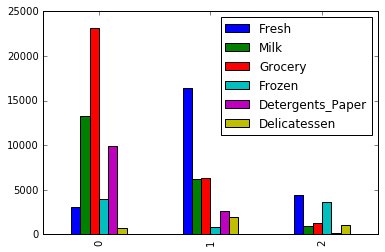

In [5]:
samples.plot.bar()

In [6]:
print "total annual spending of three persons \n", samples.sum(axis=1)

total annual spending of three persons 
0    54065
1    34542
2    11333
dtype: int64


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
200   24.3  91.8     94.5    77.7              94.1          41.4
300   74.1  69.1     58.9    28.1              68.0          78.4
400   30.9  11.1      8.4    75.5              14.0          52.3


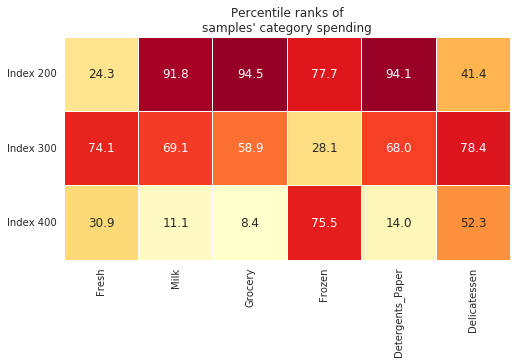

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.title('Percentile ranks of\nsamples\' category spending')

In [8]:
display(samples - data.mean().round())
display(samples - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-8933.0,7444.0,15176.0,869.0,7078.0,-794.0
1,4448.0,447.0,-1591.0,-2248.0,-219.0,480.0
2,-7554.0,-4890.0,-6713.0,504.0,-2728.0,-511.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-5437.0,9613.0,18371.0,2415.0,9143.0,-235.0
1,7944.0,2616.0,1604.0,-702.0,1846.0,1039.0
2,-4058.0,-2721.0,-3518.0,2050.0,-663.0,48.0


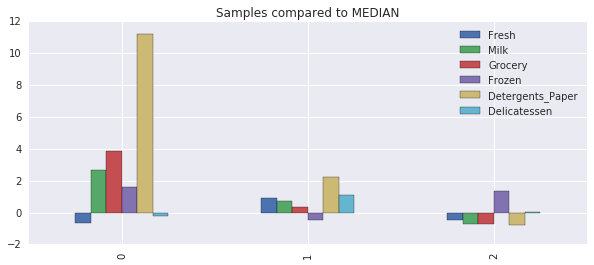

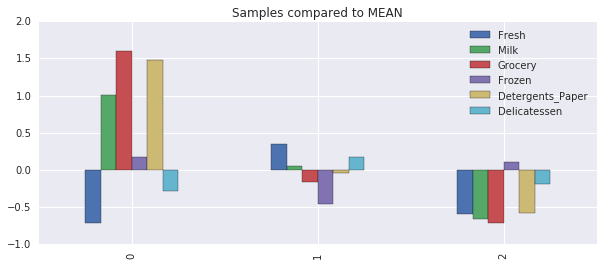

In [10]:
((samples-data.median()) / data.median()).plot.bar(figsize=(10,4), title='Samples compared to MEDIAN', grid=True)
((samples-data.mean()) / data.std()).plot.bar(figsize=(10,4), title='Samples compared to MEAN', grid=True);

**Answer: By looking at the plots above, it looks like Customer 0 (index 200) is a Marketplace, which buys Grocery, Milk and Detergent paper (staple household items) a lot much more than the average spending by a customer. We can also see that there is a high positive deviation from Median and that means there are only few customers like that big exists in the data. Moreover, the total spending is too high that customer 0 seems very much like a big Marketplace.

Customer 1 (index 300) is a cafe/restaurant which needs to buy Fresh, Milk and Grocery more to run their business. Their annual spending on Fresh items is closer to the average spending of a customer.

And the customer 2 (index 400) looks like an individual who buys Fresh, Frozen for his/her livelihood and his/her spending is much less than the average spending of a customer. Usually individual customers are much more than the big marketplaces which we can easily see from the median graph, as their value is very close to the median customer spending. Moreover total annual spending is also way less than the Customer 0 or Customer 1**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [11]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data
target_label= data["Grocery"]
features= new_data.drop(["Grocery"], axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target_label,test_size=0.25, random_state=40)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=40)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)


print score

0.807810258102


In [12]:
print regressor.feature_importances_

features.head(1)

[ 0.02126718  0.09108575  0.01371808  0.84374591  0.03018308]


,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,214,2674,1338


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:I attempted to predict "Grocery" using rest of the 5 features. The predicted R^2 score is 0.80 (which is close to 1), that means the "Grocery" feature can be predicted easily using the other 5 features. Hence, Grocery feature may not be necessary for identifying customers' spending habits**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

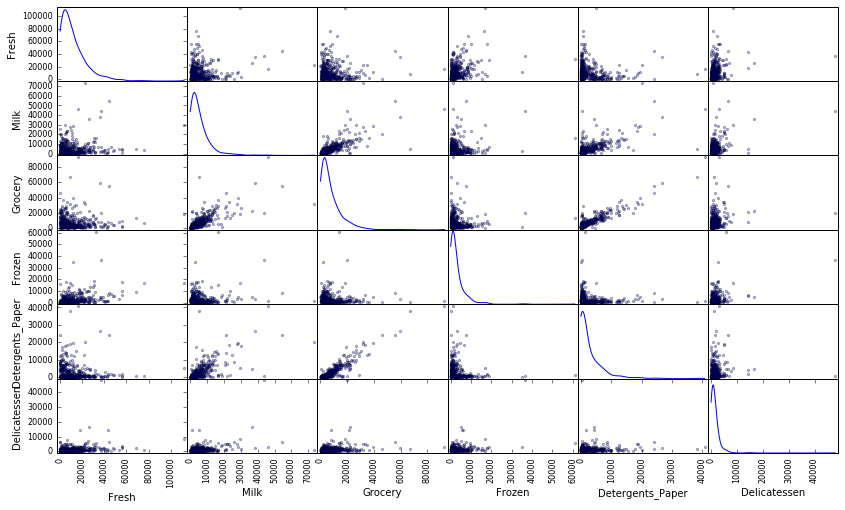

In [70]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

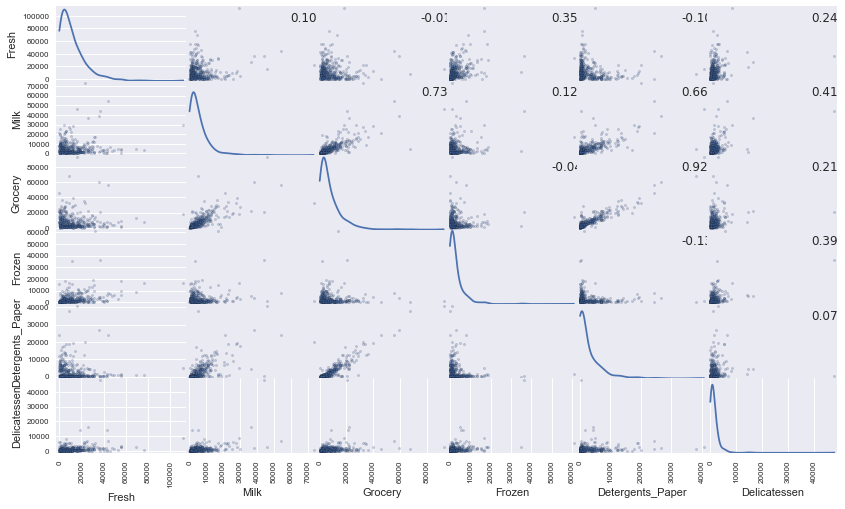

In [14]:
## Another plot for closer look at the correlations

# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

# Reformat data.corr() for plotting
corr = data.corr().as_matrix()

# Plot scatter matrix with correlations
for i,j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.2f"%corr[i,j], (0.8,0.8), xycoords='axes fraction')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

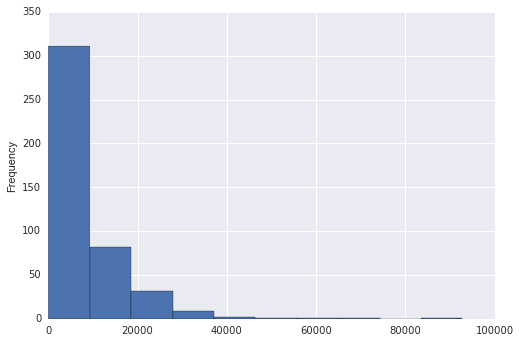

In [15]:
display(data['Grocery'].plot.hist())

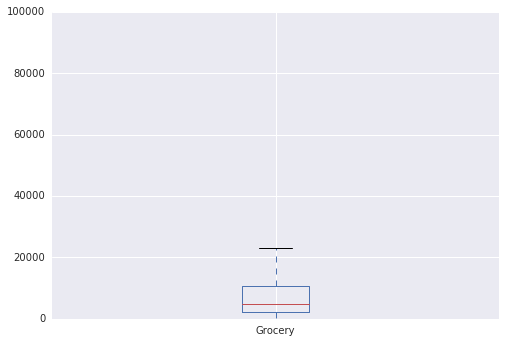

In [16]:
display(data['Grocery'].plot.box())

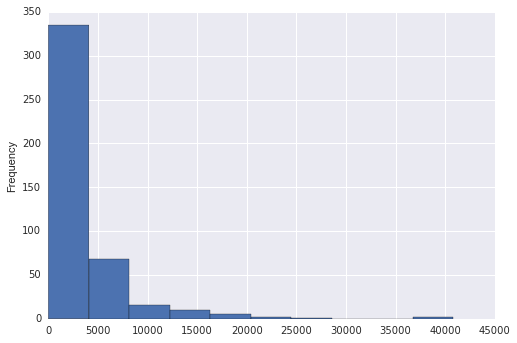

In [17]:
display(data['Detergents_Paper'].plot.hist())

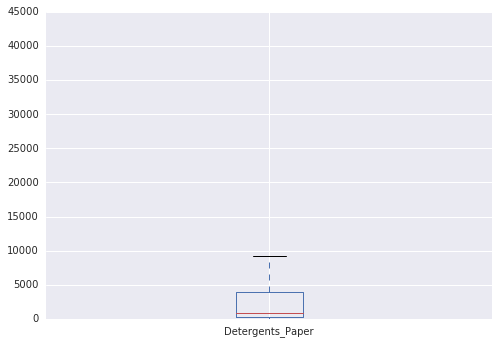

In [18]:
display(data['Detergents_Paper'].plot.box())

**Answer:"Grocery and Detergents_paper" seems correlated with each other. This confirms my suspicion because when I considered Grocery or Detergents_paper as the label/target feature, R^2 score was close to 0.8 for both the features.


The data for both Grocery and Detergents_paper has higher variance than any other feature in the dataset. Looking at the above histograms and boxplot, we can say that data for Grocery and Detergents_paper is not normally distributed and is positively skewed as well. These features also have many samples of outliers which are outside the range of 1.5* interquartile range


To some extent, "Grocery and Milk" and "Detergents_paper and Milk" are also correlated. But this denies my suspicion about the relevance of the feature to predict as R^2 score is -0.198 when considering  Milk as the target label**

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

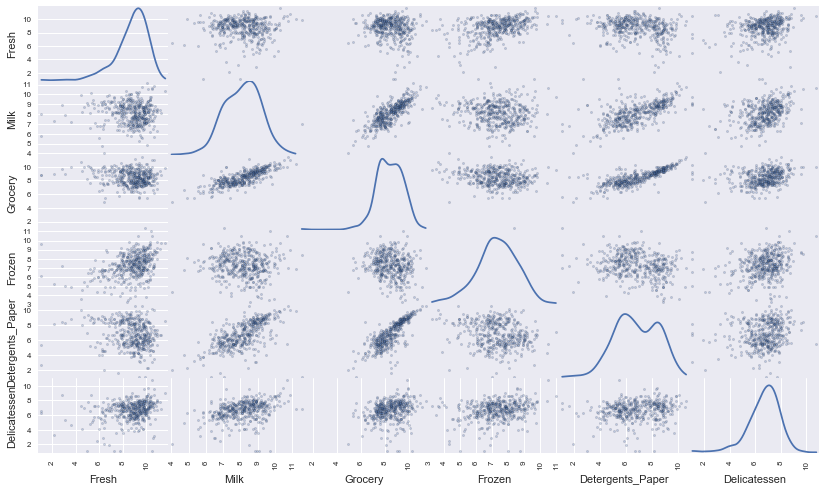

In [19]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [20]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
1,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


In [21]:
log_samples.sum(axis=1)

0    51.648044
1    49.409362
2    42.464148
dtype: float64

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [22]:
# Display a description of the dataset
display(log_data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [23]:
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers.extend((log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]).index)
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = []
print outliers



# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicatessen':
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [24]:
print np.sort(outliers)
print (len(outliers))
print len(np.unique(outliers))

[ 38  57  65  65  66  66  75  75  81  86  95  96  98 109 128 128 137 142
 145 154 154 154 161 171 175 183 184 187 193 203 218 233 264 285 289 304
 305 325 338 343 353 355 356 357 412 420 429 439]
48
42


In [25]:
dup_indices=[65,66,75,128,154]

log_data.iloc[dup_indices]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


**Answer: There are 42 data points which are considered as outliers in one or the feature and 6 out of 42 data points are multi-feature outliers. Yes, these data points should be removed from the dataset. Outliers is a difficult problem in unsupervised clustering algorithms and can highly skew the results. For example, k-means algorithm is quite sensitive to outliers. It is simply because k-means tries to optimize the sum of squares. And thus a large deviation (such as of an outlier) can get a lot of weight.

If any data points that do not need to removed from the dataset even though they are outliers are Index[75,154] because Grocery and Detergents_Paper are correlated. So we are not getting any gain by removing these datapoints rather we are just losing some sample points from our dataset **

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

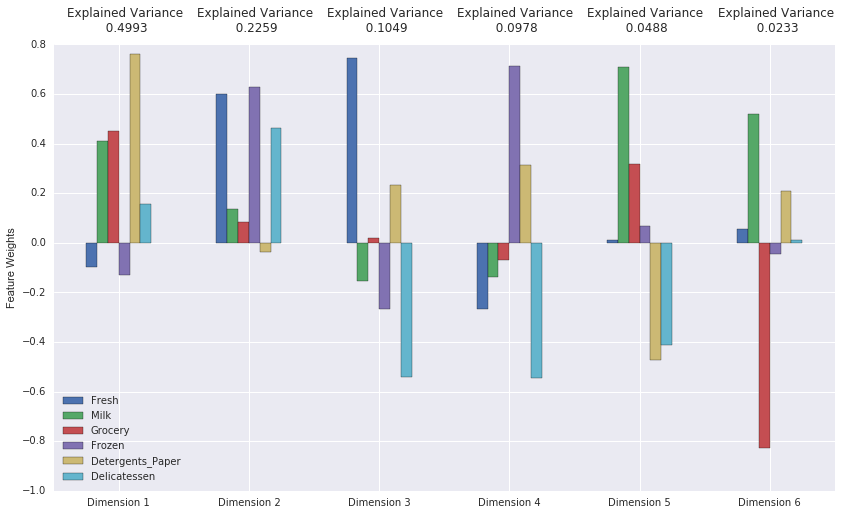

In [26]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [83]:
print " total variance by first and second PC", np.sum(pca.explained_variance_ratio_[:2])
print " total variance by first four PC      ", np.sum(pca.explained_variance_ratio_[:4])

 total variance by first and second PC 0.725252904866
 total variance by first four PC       0.927953605231


**Answer:0.725 is the total variance by the first and second principal component (PC). 0.927 is the total variance by the first four principal components. That means, first four PC contains majority of the information about customer spending and hence we can ignore the last two dimension.


PCA deals with the variance of the data and the correlation between features. 
1st dimension shows higher variance/ positive magnitude in customer spending on purchase of Detergents_paper, Grocery and Milk and comparitvely less variance or small positive magnitudes on purchase of products like Fresh, Frozen and Delicatessen. This pattern might represent spending in household staples products that are purchased together, which is typically the behavior of retailers or Marketplace.

2nd dimension shows high variance in customer spending on Frozen, Fresh and Delicatessen and less variance on products like Detergents_paper, Grocery and Milk. This behavior of buying Fresh items is typically shown by customers like cafes/restaurants. 

The 3rd dimension shows large positive weight for Fresh and large negative weight for Delicatessen.
The component reveals which customers buy a lot of Fresh and not much Delicatessen, as well as customers who buy in opposite proportions. This pattern reflects the variation in spending on items that need to be cooked & prepared vs items that are "ready to eat"

The 4th dimension shows large positive weight for Milk and Grocery and large negative weight for Detergents_paper and Delicateseen. This behavior of buying lot of Milk and not much household items reflects the pattern of customers like coffee house who relies more on dairy products.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [27]:
# Display sample log-data after having a PCA transformation applied
samples_pcatransformed= (pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))
samples_pcatransformed

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0820,0.1314,-0.3994,1.4197,0.4747,-0.2263
1,1.3844,0.4588,0.5028,-0.9154,-0.3444,0.3515
2,-2.4842,-0.0147,-0.9005,0.3315,-0.5147,-0.0357


In [28]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
1,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [29]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [30]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0820,0.1314
1,1.3844,0.4588
2,-2.4842,-0.0147


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

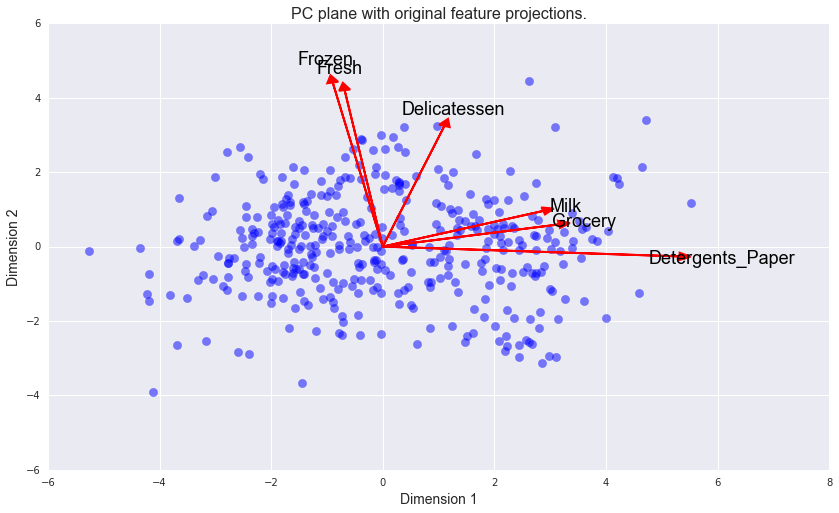

In [31]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

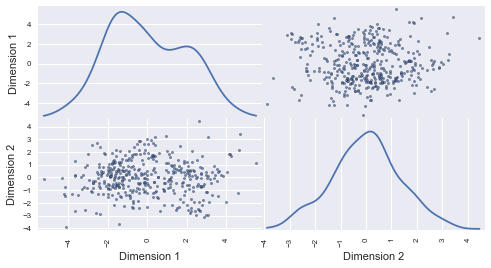

In [32]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');

##From the biplot, 'Milk','Grocery' and 'Detergents_Paper' are most strongly correlated with the first component. 'Frozen', 'Fresh' and 'Delicatessen' are assicuated with the second component. Yes these observations are completely in sync with the pca_results plot that we obtained earlier.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:K-means clustering algorithm divides the samples in n-groups of equal variance. It is often called as Hard Clustering. K-means is simple, easy to implement, easy to interpret results and works well if clusters are spherical. Also, K-means is fast and efficient as the complexity is linear with the number of data.


Gaussian Mixture Model(GMM) clustering is a soft clustering algorithm. Though K-means is a special case of GMM in which each cluster’s covariance along all dimensions approaches 0, GMM provides much more flexibility in terms of cluster assignment. GMM is a monotonically non-decreasing likelihood algorithm which does not diverge (tries to minimize towards centroid and increase ML) but can get stuck at local minima like K-means. GMM can work with any kind of distribution of data.

Both of these algorithm can work well with this reduced_data as this data is free from outliers which is a sensitive case with K-means and is pretty much normally distributed. Hence cluster could be spherical in shape. So both K-means and GMM can work well.**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
from sklearn.cluster import KMeans
# TODO: Apply your clustering algorithm of choice to the reduced data 
KM = KMeans(n_clusters=2, random_state=40)
clusterer = KM.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score 
score = silhouette_score(reduced_data,preds)
print score

0.447157742293


In [34]:
from sklearn.mixture import GMM
# TODO: Apply your clustering algorithm of choice to the reduced data 
GM = GMM(n_components=2, random_state=40)
clusterer = GM.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score 
score = silhouette_score(reduced_data,preds)
print score

0.443601474015


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:KMeans with cluster=2, silhouette score= 0.44715..KMeans with cluster=3, silhouette score= 0.3639..KMeans with cluster=4, silhouette score= 0.3311...KMeans with cluster=6, silhouette score= 0.3636

Gaussian Mixture Model with cluster=2, silhouette score= 0.44360
         
Tries different number of clusters, but 2 clusters gave me the best results**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

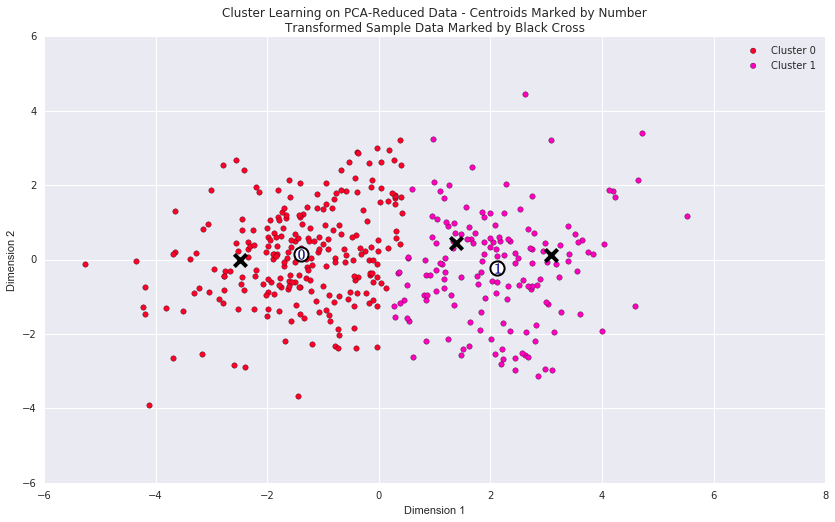

In [36]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [37]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


In [38]:
np.sum(true_centers,axis=1)

Segment 0    17116.0
Segment 1    31439.0
dtype: float64

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [39]:
display(true_centers - data.mean().round())
display(true_centers - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2549.0,-3858.0,-5502.0,-872.0,-2574.0,-754.0
Segment 1,-6576.0,1984.0,3581.0,-1949.0,1563.0,-389.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,947.0,-1689.0,-2307.0,674.0,-509.0,-195.0
Segment 1,-3080.0,4153.0,6776.0,-403.0,3628.0,170.0


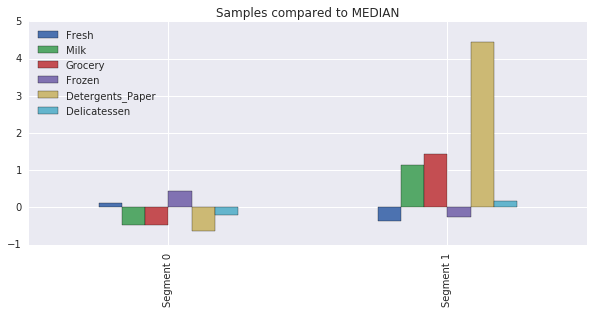

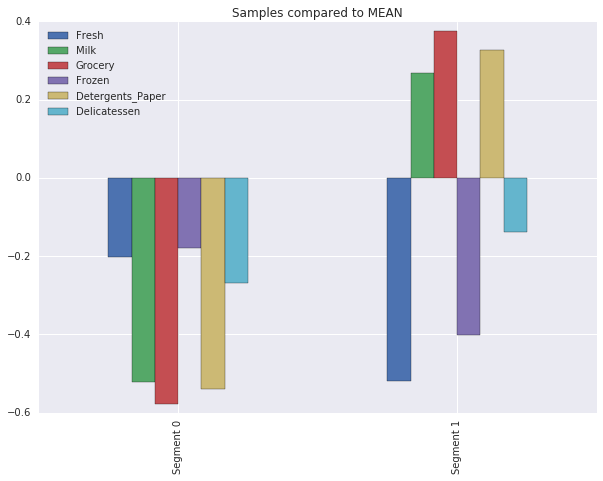

In [40]:
((true_centers-data.median()) / data.median()).plot.bar(figsize=(10,4), title='Samples compared to MEDIAN', grid=True)
((true_centers-data.mean()) / data.std()).plot.bar(figsize=(10,7), title='Samples compared to MEAN', grid=True);

**Answer:A customer who is assigned to 'Cluster 0'should best identify as a cafe/restaurant which sells 'Fresh'and 'Frozen'as its average spending on food items ('Fresh' and 'Frozen') is more than other products but lower than the average spending of an customer. Also the median of its spending is very close to the median of the data, that means Cluster 0 spending pattern is very usual compare to other customers in the data. 

Whereas a customer who is assigned to 'Cluster 1' should be best identified as a Marketplace/Retailer which sells 'Grocery','Milk', and 'Detergents_Paper' as its average spending on these three household items are way higher than the other products as well as higher than the average customer spending. Moreover, looking at the high positive magnitude in the median graph indicates that Cluster 1 spends much more than any other usual customers in the data.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [42]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [43]:
display(samples)
display(data.mean())
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731
1,16448,6243,6360,824,2662,2005
2,4446,906,1238,3576,153,1014


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


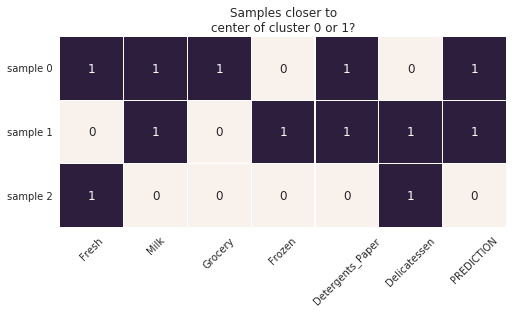

In [45]:
## To see if a sample customer is closer to the segment 0 or 1 true_centers in a given category


# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples-true_centers.iloc[0]) < np.abs(samples-true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

# see how cluster predictions align with similariy of spending in each category
df_preds = pd.concat([df_diffs, pd.Series(sample_preds, name='PREDICTION')], axis=1)
sns.heatmap(df_preds, annot=True, cbar=False, yticklabels=['sample 0', 'sample 1', 'sample 2'], linewidth=.1, square=True)
plt.title('Samples closer to\ncenter of cluster 0 or 1?')
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0);

**Answer:Sample point 0 predicted to be in Cluster 1
 ...Sample point 1 predicted to be in Cluster 1
 ...Sample point 2 predicted to be in Cluster 0

Yes, the predictions for each of these sample point are consistent with customer segmentation from Question 8. 

For Sample point 0 and 1, the values for Grocery, Milk and Detergents_paper are above average. This mirrors the category spending for the Segment 1, so the predicted cluster seems to be consistent with the sample.

Similarly, for sample point 2, the values for all the product categories (except Frozen) are below average. This mirrors the category spending for the Segment 0, so the predicted cluster seems to be consistent with the sample.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer: It is always a good idea for companies to do A/B testing before actually making any change in their products or services. Many times making a small change without analyzing the customer reaction impacts very significantly to the overall business. Also, all the customers don't react equally to the change since every person or entity or customer is different and they must have their own preferences, needs and liking to the change.

In this particular case, if the wholesale distributor is considering changing its delievery from 5 days/week to 3days/week, he/she can determines the different customer segment based on customer's business model, inventory space, availability of picking up the delievery. For example, cafes/restaurants owners who are particularly interested in "Fresh" and "Frozen" may not like this change. They like to have regular supplies throughout the week because their requirement is to have fresh items (perishable food) everyday and they may not have much inventory space to store the items for complete week. On the other hand, Marketplace whose requirements are "Grocery", "Milk" and "Detergents_Paper" (non-perishable) may not have any issue with this change of delivery as they may not require to have fresh items everyday and they must also have big inventory space to store the items.

But in order to determine if the Marketplace or cafes/restaurants would react positively or negatively, it is best to do A/B testing. From each group or cluster, draw a sample of N customers where 50% are exposed to this specific delivery service and no change in delivery system for other 50%. After that, calculate the Z score. If Z score deviates a lot from the mean, that means that particular group/cluster is unhappy and do not want this change of delivery scheme.

**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:

Suppose after A/B testing, it gets confirmed that Marketplace customers like the change of delivery scheme and we say +1 score for them and cafe/restaurant customers don't like the change of delivery scheme, so we say -1 score for these customers. Now we can consider these score (+1 or -1) as an engineering feature in our data and considered it as a target variable. We can then train a surpervised learning model with the original six features along with the target variable. After that , we can predict the customer segment for the recently acquired ten new customers using the trained model**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

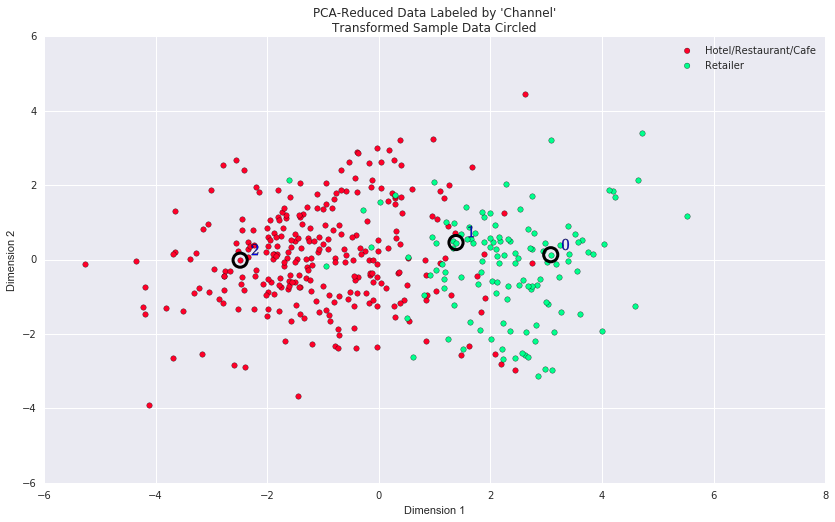

In [46]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer: Surprisingly, the clustering algorithm and number of clusters that I have chosen is very much similar to this underlying distribution of Hotel/Restaurants/Cafe customers to Retailer customers. Based on this distribution, customer segment 0 is purely classified as 'Retailers' whereas customer segment 2 is purely classified as 'Hotels/Restaurants/Cafes'. On the other hand, customer segment 1 is somewhere in the overlapping zone of both channel.

Yes, these classifications are consistent with my previous definition of the customer segments except the fact that previous definition was based on 3 different clusters ('Marketplace','Cafe' and 'Individual'), but if I had to classify them into two categories, then it must have been the same classifications as these*

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.